In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import scipy.optimize as sciopt
import pandas as pd
from scipy import stats

# import scipy.integrate as scint
# import statsmodels.api as sm
import seaborn as sns

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv("us-counties-recent.csv")
df = df[df["state"] == "Pennsylvania"]

<IPython.core.display.Javascript object>

In [3]:
means = np.array([])
county = np.array([])

for i in np.arange(42001, 42134, 2):
    dd = df[df["fips"] == i]
    means = np.concatenate([means, np.mean(dd["cases"])], axis=None)
    county = np.concatenate([county, dd.drop_duplicates(subset="county")["county"]])


dd = pd.DataFrame()
dd["fips"] = np.arange(42001, 42134, 2)
dd["cases_mean"] = means
dd["county"] = county

<IPython.core.display.Javascript object>

In [4]:
pop = pd.read_excel("age and sex.xlsx", sheet_name="Sheet2")

<IPython.core.display.Javascript object>

In [5]:
unavailable = []
counter = 0
for i in county:
    counter = 0
    # print(i)
    for j in pop.columns:
        if f"{i} County, Pennsylvania" == j:
            counter = counter + 1

        else:
            continue
    if counter == 0:
        unavailable.append(i)

<IPython.core.display.Javascript object>

In [6]:
print("The counties without data:", unavailable)

The counties without data: ['Bedford', 'Bradford', 'Cameron', 'Clarion', 'Clinton', 'Columbia', 'Elk', 'Forest', 'Fulton', 'Greene', 'Huntingdon', 'Jefferson', 'Juniata', 'McKean', 'Mifflin', 'Montour', 'Perry', 'Pike', 'Potter', 'Snyder', 'Sullivan', 'Susquehanna', 'Tioga', 'Union', 'Venango', 'Warren', 'Wayne', 'Wyoming']


<IPython.core.display.Javascript object>

In [7]:
for i in unavailable:
    ddx = dd.where(dd["county"] == i)
    dd = dd.drop(index=ddx.dropna().index[0])

<IPython.core.display.Javascript object>

In [8]:
a = np.array(pop.iloc[2])
a = a[1:]
dd["total population"] = a

<IPython.core.display.Javascript object>

In [9]:
# orientation

dd["percentage infected"] = dd.apply(
    lambda x: x["cases_mean"] / x["total population"],
    axis=1,
)

<IPython.core.display.Javascript object>

(array([1., 0., 1., 2., 1., 1., 1., 1., 3., 1., 2., 3., 3., 3., 4., 2., 5.,
        1., 2., 2.]),
 array([0.2024849 , 0.20753852, 0.21259214, 0.21764576, 0.22269938,
        0.227753  , 0.23280662, 0.23786024, 0.24291386, 0.24796748,
        0.2530211 , 0.25807472, 0.26312834, 0.26818196, 0.27323558,
        0.2782892 , 0.28334282, 0.28839644, 0.29345006, 0.29850368,
        0.3035573 ]),
 <BarContainer object of 20 artists>)

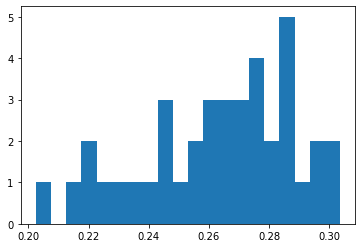

<IPython.core.display.Javascript object>

In [10]:
plt.hist(dd["percentage infected"], bins=20)